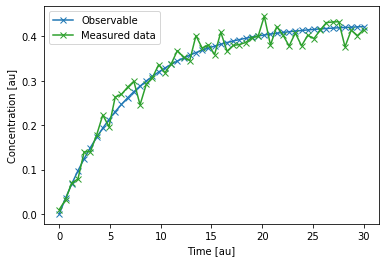

In [10]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
import pickle
import os
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=50)

# data
def get_data():
    try:
        data = pickle.load(open("data_gaussian.dat", 'rb'))
    except:
        data = mv.get_model_noisy()(mv.p_true)
        pickle.dump(data, open("data_gaussian.dat", 'wb'))
    return data
data = get_data()
# plot it
mv.viz_data_and_sim(data)

In [11]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h = abc.new("sqlite:///h_gaussian.db", data)
h = abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 23:40:21.030030, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=5.0130e+01 for t=0.
INFO:ABC:t: 0, eps: 1478.105588328931.
DEBUG:Acceptor:Encountered pd=6.2768e+01 > c=5.0130e+01, thus weight=1.0086e+00.
DEBUG:Acceptor:Encountered pd=8.0782e+01 > c=5.0130e+01, thus weight=1.0210e+00.
INFO:ABC:Acceptance rate: 100 / 265 = 3.7736e-01, ESS=9.9999e+01.
DEBUG:Acceptor:pdf_norm=8.0782e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [353.3394403640937, 739.0527941644655].
INFO:ABC:t: 1, eps: 353.3394403640937.
DEBUG:Acceptor:Encountered pd=1.2236e+02 > c=8.0782e+01, thus weight=1.1249e+00.
DEBUG:Acceptor:Encountered pd=9.1273e+01 > c=8.0782e+01, thus weight=1.0301e+00.
DEBUG:Acceptor:Encountered pd=8.5329e+01 > c=8.0782e+01, thus weight=1.0129e+00.
INFO:ABC:Acceptance rate: 100 / 326 = 3.0675e-01, ESS=8.8838e+01.
DEBUG:Acceptor:pdf_norm=1.2236e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [228.405807

In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h_badc = abc.new("sqlite:///h_gaussian_badc.db", data)
h_badc = abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 23:40:43.505384, end_time=None)>
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 1592.6621574944986.
INFO:ABC:Acceptance rate: 100 / 303 = 3.3003e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [686.5019222213743, 796.3310787472493].
INFO:ABC:t: 1, eps: 686.5019222213743.
INFO:ABC:Acceptance rate: 100 / 282 = 3.5461e-01, ESS=9.2406e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [354.6468173113365, 343.2509611106872].
INFO:ABC:t: 2, eps: 343.2509611106872.
INFO:ABC:Acceptance rate: 100 / 355 = 2.8169e-01, ESS=8.8764e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=3.
DEBUG:Epsilon:Proposed temperatures: [253.6201848835062, 171.6254805553436].
INFO:ABC:t: 3, eps: 171.6254805553436.
INFO:ABC:Acceptance rate: 100 / 422 = 2.3697e-01, ESS=8.8889e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=4.


In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h_badc = abc.new("sqlite:///h_gaussian_badc.db", data)
h_badc = abc.run(m)

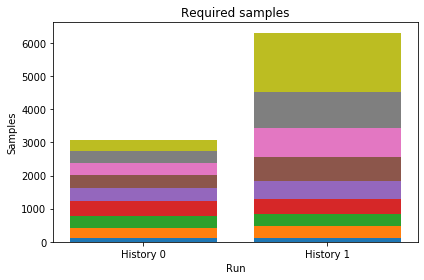

In [9]:
h = pyabc.History("sqlite:///h_gaussian.db")
h_badc = pyabc.History("sqlite:///h_gaussian_badc.db")
h_rejection = pyabc.History("sqlite:///h_gaussian_rejection.db")

histories = [h_rejection, h_badc, h]
labels = ["Rejection ABC", "ABC-SMC", "ABC-SMC Adaptive c"]
pyabc.visualization.plot_sample_numbers(histories)